### Description:

    In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.

    The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features that can be downloaded here.

    The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.

## import requied Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



In [2]:
#import train and test set from UCI links

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 
              'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [133]:
train_set.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0


# Train_Set

In [4]:
# information about the dataset

print("TRAIN DATA")
print("Features name in the data set: ","\n",train_set.columns)
print("======"*15)
print('Rows: {} Columns: {}'.format(train_set.shape[0], train_set.shape[1]))
print("======"*15)
print("Shape of the dataset(number of rows and columns):","\n",train_set.shape)
print("======"*15)
print("Information about the dataset: ","\n",train_set.info())
print("======"*15)
print("Datatype about the dataset: ","\n",train_set.dtypes)


TRAIN DATA
Features name in the data set:  
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')
Rows: 32561 Columns: 15
Shape of the dataset(number of rows and columns): 
 (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex          

# Understand Data

In [5]:
# Viewing the data statistics
print("Summary about the numerical dataset:")
print("======"*15)
train_set.describe()



Summary about the numerical dataset:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
print("Summary about the categorical dataset:")
print("======"*15)
train_set.describe(include="O")

Summary about the categorical dataset:


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [7]:
#find out numerical and categorical features for train set

numerical_features=[feature for feature in train_set.columns if train_set[feature].dtype!='O']
categorical_features=[feature for feature in  train_set.columns if  train_set[feature].dtype=='O' and feature!='wage_class']


print('categorical features: ''\n',categorical_features)
print('\n')
print('numerical features: ''\n',numerical_features)


categorical features: 
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


numerical features: 
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [8]:
numerical_features = train_set.select_dtypes(include='number')
categorical_features = train_set.select_dtypes(include='object')

In [9]:
numerical_features.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [10]:
categorical_features.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


## Missing Value Tratment

In [11]:
#Check for missing values
for feature in train_set.columns:
    print(feature,':', train_set[feature].isnull().sum())
#print("Number of missing values each columns: ","\n",train_data.isnull().sum())    
print("======"*15)
print("percentage of missing values each columns: ","\n",train_set.isnull().sum()/len(train_set)*100)    

age : 0
workclass : 0
fnlwgt : 0
education : 0
education_num : 0
marital_status : 0
occupation : 0
relationship : 0
race : 0
sex : 0
capital_gain : 0
capital_loss : 0
hours_per_week : 0
native_country : 0
wage_class : 0
percentage of missing values each columns:  
 age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
wage_class        0.0
dtype: float64


<AxesSubplot:>

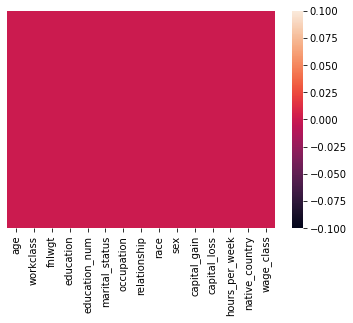

In [12]:
sns.heatmap(train_set.isnull(),yticklabels=False)

# Outlier Tratment

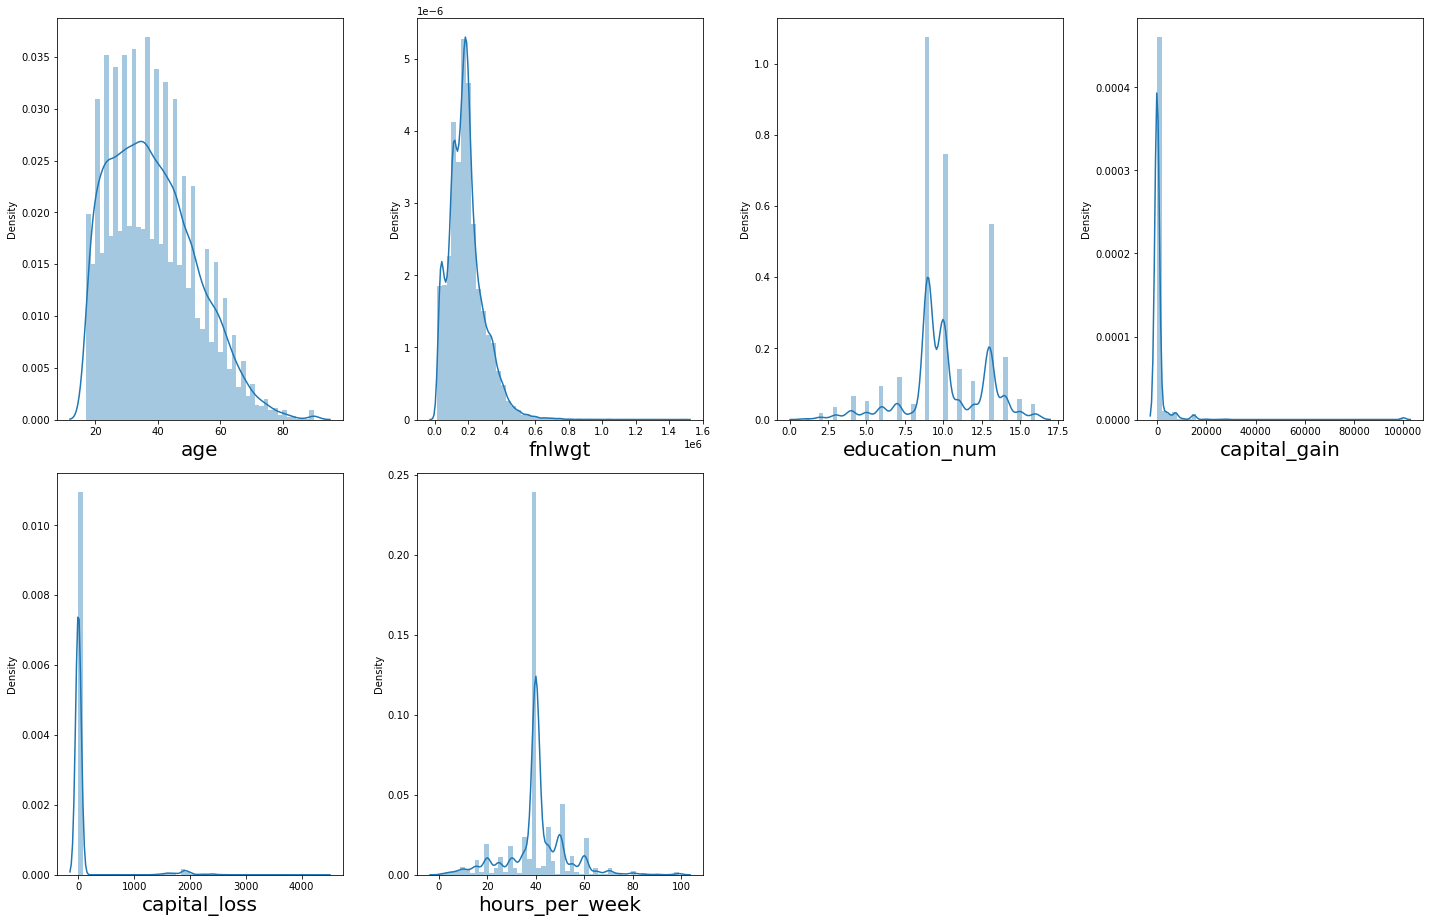

In [13]:
train_numerical_features = train_set.select_dtypes(include='number')

# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train_numerical_features:
    if plotnumber<=12 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(train_numerical_features[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

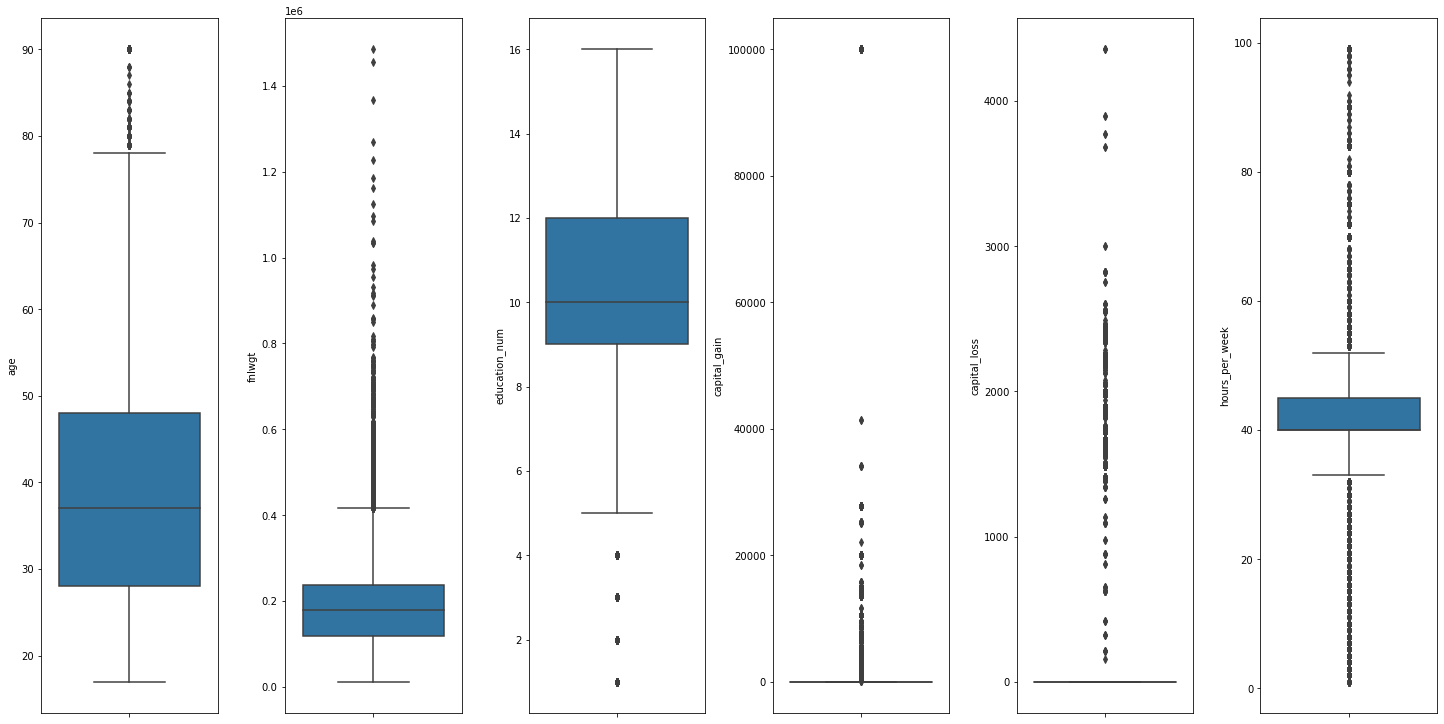

In [14]:
# create a box plot
fig , ax = plt.subplots(ncols=6,nrows=1,figsize=(20,10))
index=0
ax = ax.flatten()

for col, value in train_numerical_features.items():
    sns.boxplot(y=col,data= train_numerical_features, ax = ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0) 

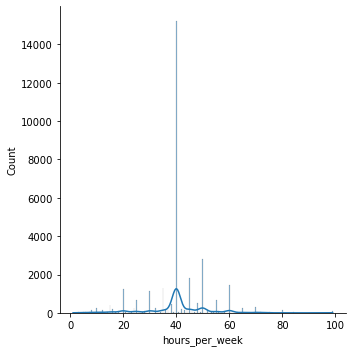

In [15]:
sns.displot(train_set, x="hours_per_week",kind='hist',kde=True)

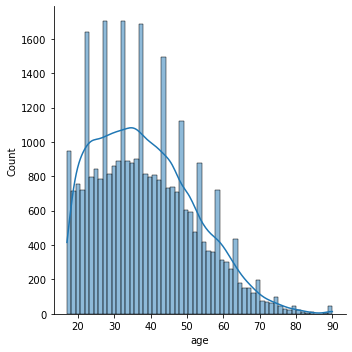

In [16]:
sns.displot(train_set, x="age",kind='hist',kde=True)

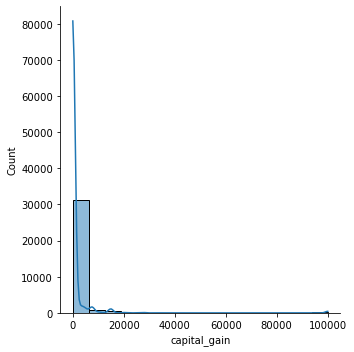

In [17]:
sns.displot(train_set, x="capital_gain",kind='hist',kde=True)

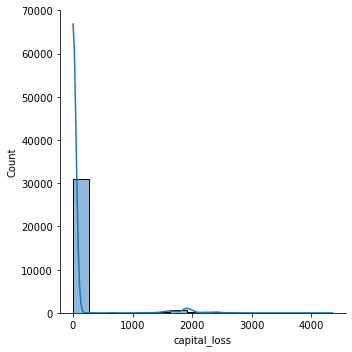

In [18]:
sns.displot(train_set, x="capital_loss",kind='hist',kde=True)

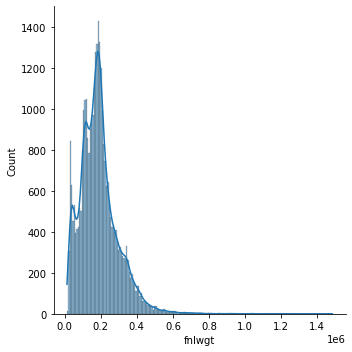

In [19]:
sns.displot(train_set, x="fnlwgt",kind='hist',kde=True)

# Categorical column details

In [20]:
def cat_Column(data):
    print("Unique data: ", data.unique(),"\n")
    print("Numberof unique data: ", data.nunique(),"\n")
    print("What are values of unique data:","\n", data.value_counts(),"\n")
    print(data.value_counts().plot(kind = 'bar'))
    print(round(data.value_counts(normalize=True) * 100, 2).astype('str') + ' %')


Unique data:  [' <=50K' ' >50K'] 

Numberof unique data:  2 

What are values of unique data: 
  <=50K    24720
 >50K      7841
Name: wage_class, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)
 <=50K    75.92 %
 >50K     24.08 %
Name: wage_class, dtype: object


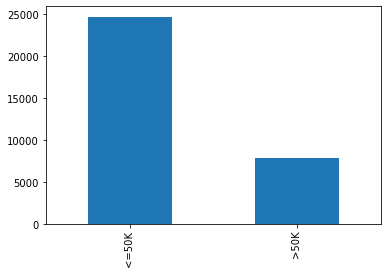

In [21]:
cat_Column(train_set["wage_class"]) # imbalance dataset

Unique data:  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

Numberof unique data:  9 

What are values of unique data: 
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)
 Private             69.7 %
 Self-emp-not-inc     7.8 %
 Local-gov           6.43 %
 ?                   5.64 %
 State-gov           3.99 %
 Self-emp-inc        3.43 %
 Federal-gov         2.95 %
 Without-pay         0.04 %
 Never-worked        0.02 %
Name: workclass, dtype: object


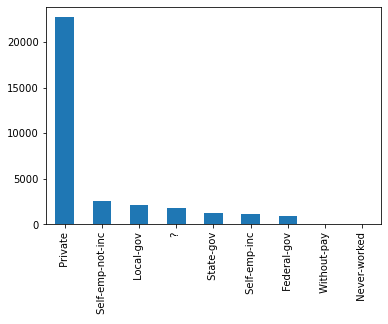

In [22]:
cat_Column(train_set["workclass"])

Unique data:  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

Numberof unique data:  16 

What are values of unique data: 
 9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)
9     32.25 %
10    22.39 %
13    16.45 %
14     5.29 %
11     4.24 %
7      3.61 %
12     3.28 %
6      2.87 %
4      1.98 %
15     1.77 %
5      1.58 %
8      1.33 %
16     1.27 %
3      1.02 %
2      0.52 %
1      0.16 %
Name: education_num, dtype: object


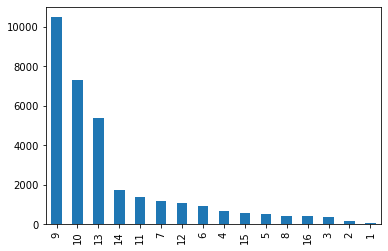

In [23]:
cat_Column(train_set["education_num"])

Unique data:  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Numberof unique data:  16 

What are values of unique data: 
  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)
 HS-grad         32.25 %
 Some-college    22.39 %
 Bachelors       16.45 %
 Masters          5.29 %
 Assoc-voc        4.24 %
 11th             3.61 %
 Assoc-acdm       3.28 %
 10th             2.87 %
 7th-8th          1.98 %
 Prof-school      1.77 %
 9th              1.58 %
 12th             1.33 

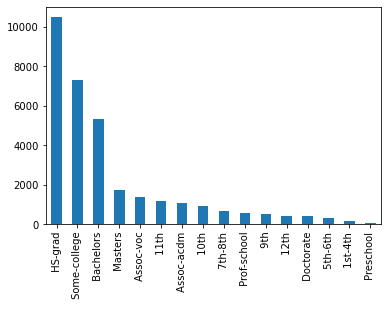

In [24]:
cat_Column(train_set["education"])

Unique data:  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Numberof unique data:  7 

What are values of unique data: 
  Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)
 Married-civ-spouse       45.99 %
 Never-married            32.81 %
 Divorced                 13.65 %
 Separated                 3.15 %
 Widowed                   3.05 %
 Married-spouse-absent     1.28 %
 Married-AF-spouse         0.07 %
Name: marital_status, dtype: object


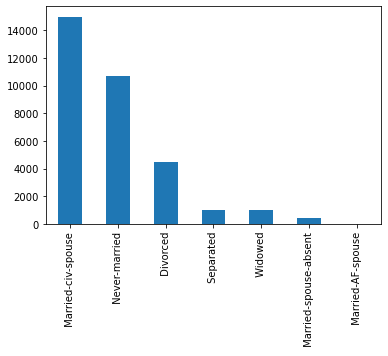

In [25]:
cat_Column(train_set["marital_status"])

Unique data:  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

Numberof unique data:  15 

What are values of unique data: 
  Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)
 Prof-specialty       12.71 %
 Craft-repair         12.59 %
 Exec-managerial      12.49 %
 Adm-clerical         11.58 %
 Sales                11.21 %
 Other-service        10.12 %
 Machine-op

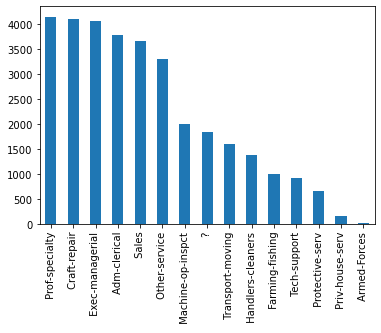

In [26]:
cat_Column(train_set["occupation"])

Unique data:  [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

Numberof unique data:  6 

What are values of unique data: 
  Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)
 Husband           40.52 %
 Not-in-family     25.51 %
 Own-child         15.56 %
 Unmarried         10.58 %
 Wife               4.82 %
 Other-relative     3.01 %
Name: relationship, dtype: object


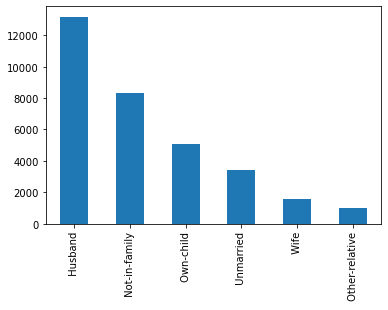

In [27]:
cat_Column(train_set["relationship"])

Unique data:  [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

Numberof unique data:  5 

What are values of unique data: 
  White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)
 White                 85.43 %
 Black                  9.59 %
 Asian-Pac-Islander     3.19 %
 Amer-Indian-Eskimo     0.96 %
 Other                  0.83 %
Name: race, dtype: object


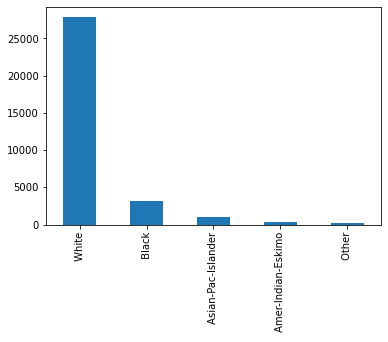

In [28]:
cat_Column(train_set["race"])

Unique data:  [' Male' ' Female'] 

Numberof unique data:  2 

What are values of unique data: 
  Male      21790
 Female    10771
Name: sex, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)
 Male      66.92 %
 Female    33.08 %
Name: sex, dtype: object


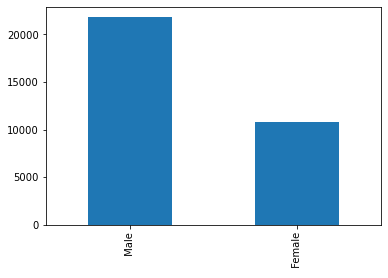

In [29]:
cat_Column(train_set["sex"])

Unique data:  [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands'] 

Numberof unique data:  42 

What are values of unique data: 
  United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Ja

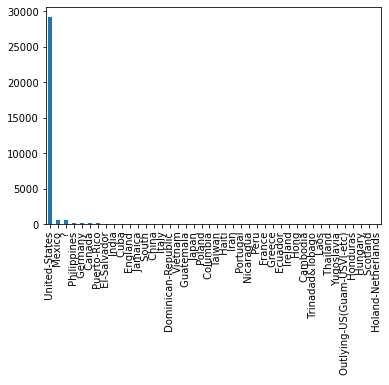

In [30]:
cat_Column(train_set["native_country"])

In [31]:
# changing "?" with unknown

train_set['occupation'] = train_set['occupation'].str.replace('?', 'unknown')
train_set['workclass'] = train_set['workclass'].str.replace('?', 'unknown')
train_set['native_country'] = train_set['native_country'].str.replace('?', 'unknown')

In [32]:
#Find out distinct values for each numerical feature
for feature in numerical_features:
    print(feature,':', train_set[feature].nunique())

age : 73
fnlwgt : 21648
education_num : 16
capital_gain : 119
capital_loss : 92
hours_per_week : 94


In [33]:
#Find out distinct values for each categorical feature
for feature in categorical_features:
    print(feature,':', train_set[feature].nunique())

workclass : 9
education : 16
marital_status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native_country : 42
wage_class : 2


In [34]:
#for each categorical value we calculate relative frequency of unique classes.
for feature in categorical_features:
    freq=train_set[feature].value_counts('f').rename_axis(feature).reset_index(name='relative frequency')
    print('\n')
    print(freq)



           workclass  relative frequency
0            Private            0.697030
1   Self-emp-not-inc            0.078038
2          Local-gov            0.064279
3            unknown            0.056386
4          State-gov            0.039864
5       Self-emp-inc            0.034274
6        Federal-gov            0.029483
7        Without-pay            0.000430
8       Never-worked            0.000215


        education  relative frequency
0         HS-grad            0.322502
1    Some-college            0.223918
2       Bachelors            0.164461
3         Masters            0.052916
4       Assoc-voc            0.042443
5            11th            0.036086
6      Assoc-acdm            0.032769
7            10th            0.028654
8         7th-8th            0.019840
9     Prof-school            0.017690
10            9th            0.015786
11           12th            0.013298
12      Doctorate            0.012684
13        5th-6th            0.010227
14        1st-4t

In [35]:
#Check for imbalanced target (In our case 76% are in class <=50K and 24% >50K)
train_set['wage_class'].value_counts('f') 

 <=50K    0.75919
 >50K     0.24081
Name: wage_class, dtype: float64

In [36]:
train_set['wage_class'].value_counts() 

 <=50K    24720
 >50K      7841
Name: wage_class, dtype: int64

# Now let's do some graphs for train set in order to find key relationships !!!

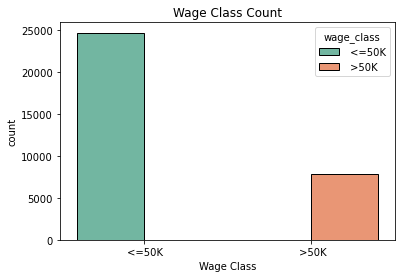

In [37]:
# Now let's do some graphs for train set in order to find key relationships !!!
ax=sns.countplot(train_set['wage_class'],hue=train_set['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Wage Class Count')
ax.set_xlabel('Wage Class')
plt.show()

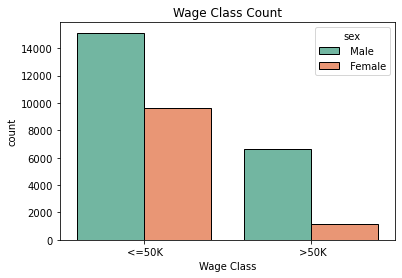

In [38]:
# Now let's do some graphs for train set in order to find key relationships !!!
ax=sns.countplot(train_set['wage_class'],hue=train_set['sex'],edgecolor='k',palette='Set2')
ax.set_title('Wage Class Count')
ax.set_xlabel('Wage Class')
plt.show()

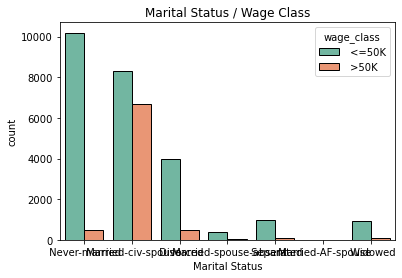

In [39]:
ax=sns.countplot(train_set['marital_status'], hue=train_set['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Marital Status / Wage Class')
ax.set_xlabel('Marital Status')
plt.show()

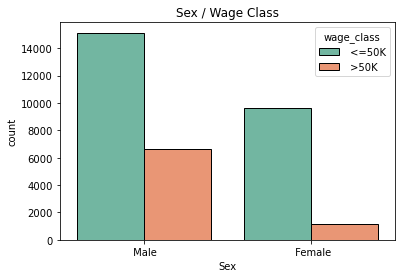

In [40]:
ax=sns.countplot(train_set['sex'], hue=train_set['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Sex / Wage Class')
ax.set_xlabel('Sex')
plt.show()

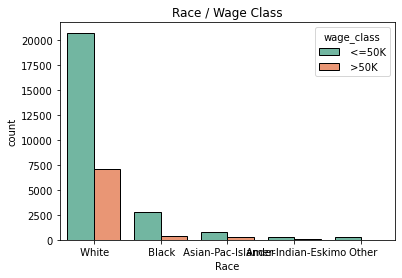

In [41]:
ax=sns.countplot(train_set['race'], hue=train_set['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Race / Wage Class')
ax.set_xlabel('Race')
plt.show()

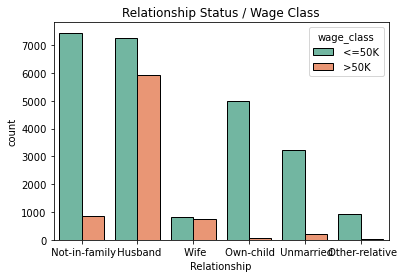

In [42]:
ax=sns.countplot(train_set['relationship'], hue=train_set['wage_class'],edgecolor='k',palette='Set2')
ax.set_title('Relationship Status / Wage Class')
ax.set_xlabel('Relationship')
plt.show()

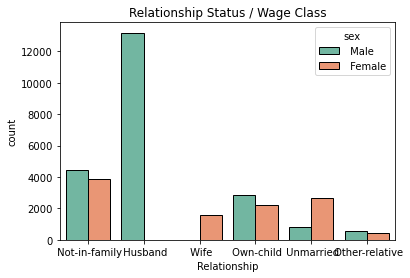

In [43]:
ax=sns.countplot(train_set['relationship'], hue=train_set['sex'],edgecolor='k',palette='Set2')
ax.set_title('Relationship Status / Wage Class')
ax.set_xlabel('Relationship')
plt.show()

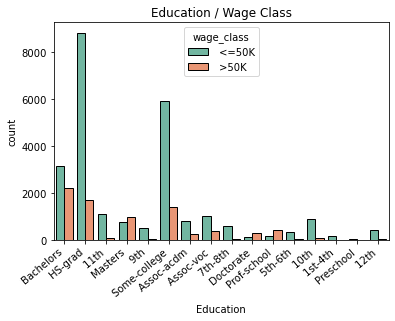

In [44]:
ax=sns.countplot(train_set['education'], hue=train_set['wage_class'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Education / Wage Class')
ax.set_xlabel('Education')
plt.show()

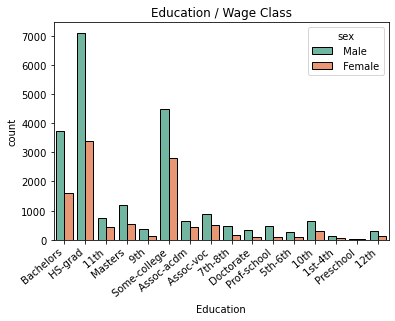

In [45]:
ax=sns.countplot(train_set['education'], hue=train_set['sex'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Education / Wage Class')
ax.set_xlabel('Education')
plt.show()

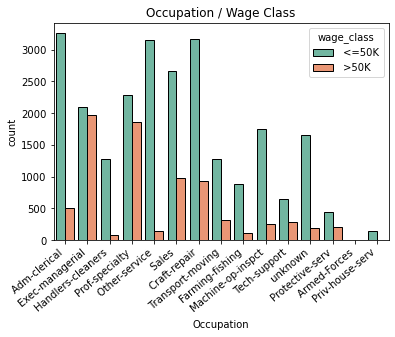

In [46]:
ax=sns.countplot(train_set['occupation'], hue=train_set['wage_class'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Occupation / Wage Class')
ax.set_xlabel('Occupation')
plt.show()

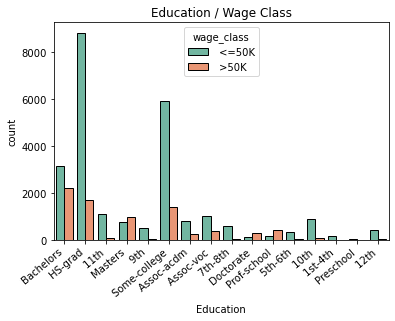

In [47]:
ax=sns.countplot(train_set['education'], hue=train_set['wage_class'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Education / Wage Class')
ax.set_xlabel('Education')
plt.show()

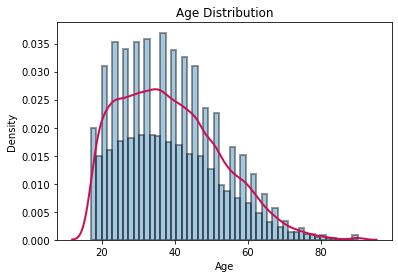

In [48]:
ax=sns.distplot(train_set['age'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
plt.show()

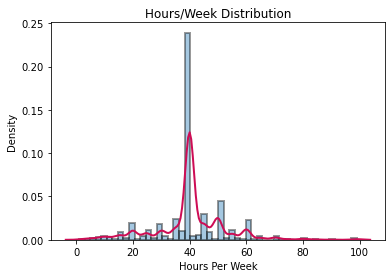

In [49]:
ax=sns.distplot(train_set['hours_per_week'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Hours/Week Distribution')
ax.set_xlabel('Hours Per Week')
plt.show()

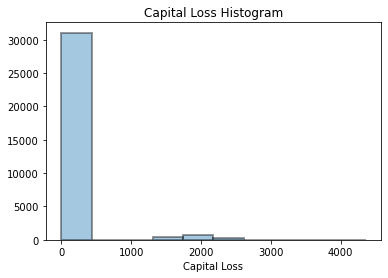

In [50]:
ax=sns.distplot(train_set['capital_loss'],bins=10,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('Capital Loss Histogram')
ax.set_xlabel('Capital Loss')
plt.show()

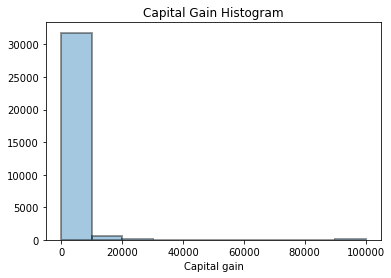

In [51]:
ax=sns.distplot(train_set['capital_gain'],bins=10,kde=False,hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('Capital Gain Histogram')
ax.set_xlabel('Capital gain')
plt.show()

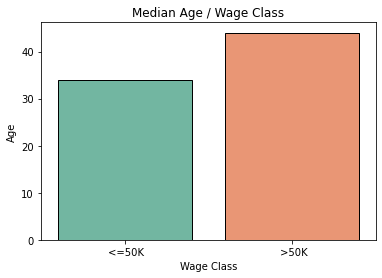

In [52]:
#median age for each wage_class
ax=sns.barplot(train_set.groupby('wage_class')['age'].median().index,train_set.groupby('wage_class')['age'].median().values,
               edgecolor='k', palette='Set2')
ax.set_ylabel('Age')
ax.set_xlabel('Wage Class')
ax.set_title('Median Age / Wage Class')
plt.show()

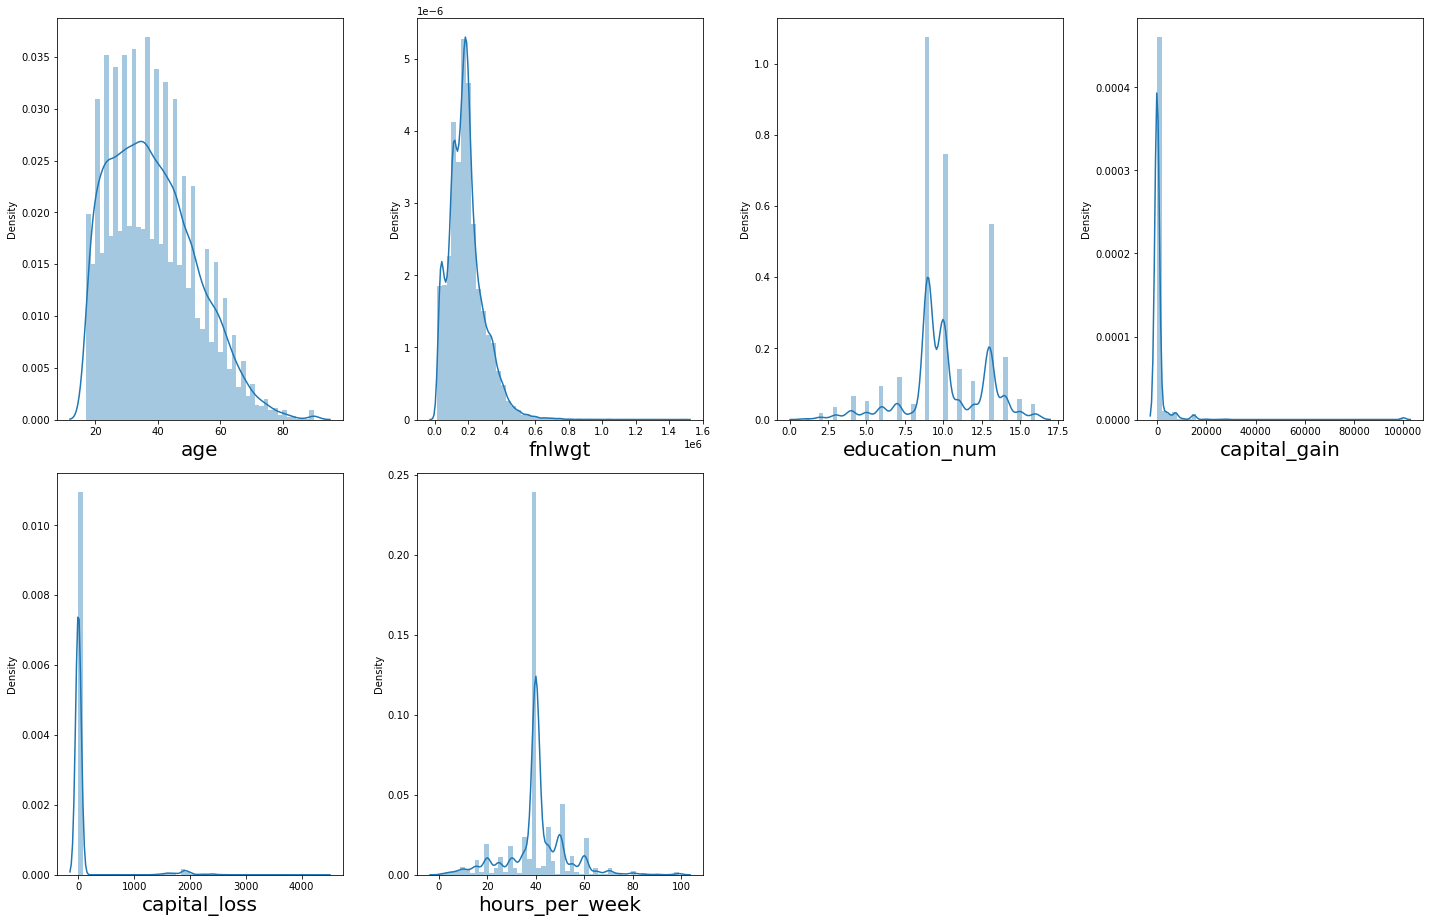

In [53]:
train_numerical_features = train_set.select_dtypes(include='number')

# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train_numerical_features:
    if plotnumber<=12 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(train_numerical_features[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()



# Outlier Treatment:

In [1]:
def drop_otliers(df,column):
    Q1=np.percentile(df[column],25)
    Q3=np.percentile(df[column],75)
    
    IQR=1.5*(Q3-Q1)
    
    lower=Q1-IQR
    upper=Q3+IQR
    
    df.drop(df[df[column]>upper].index,inplace=True)
    df.drop(df[df[column]<lower].index,inplace=True)
    

In [2]:
sns.boxplot(train_set["age"])
plt.title("before")
plt.show()    
    
# after outlier tratment    
drop_otliers(train_set,"age")
sns.boxplot(train_set["age"])
plt.title("after")
plt.show()
     

NameError: name 'sns' is not defined

In [55]:
train_numerical_features.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

### In the numerical column the outlier are present but education_num,age,hours_per_week at some condition these columns are extreme values because a person if his age and hours per week both are some relation because base on age a person can work many hours, and education_num is one type of categorical column. 

### capital_loss and capital_gain are for an individual person.  these column have outlier and rightside skew data.

# Feature Selection:

In [56]:
corr=train_set.corr()
corr


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


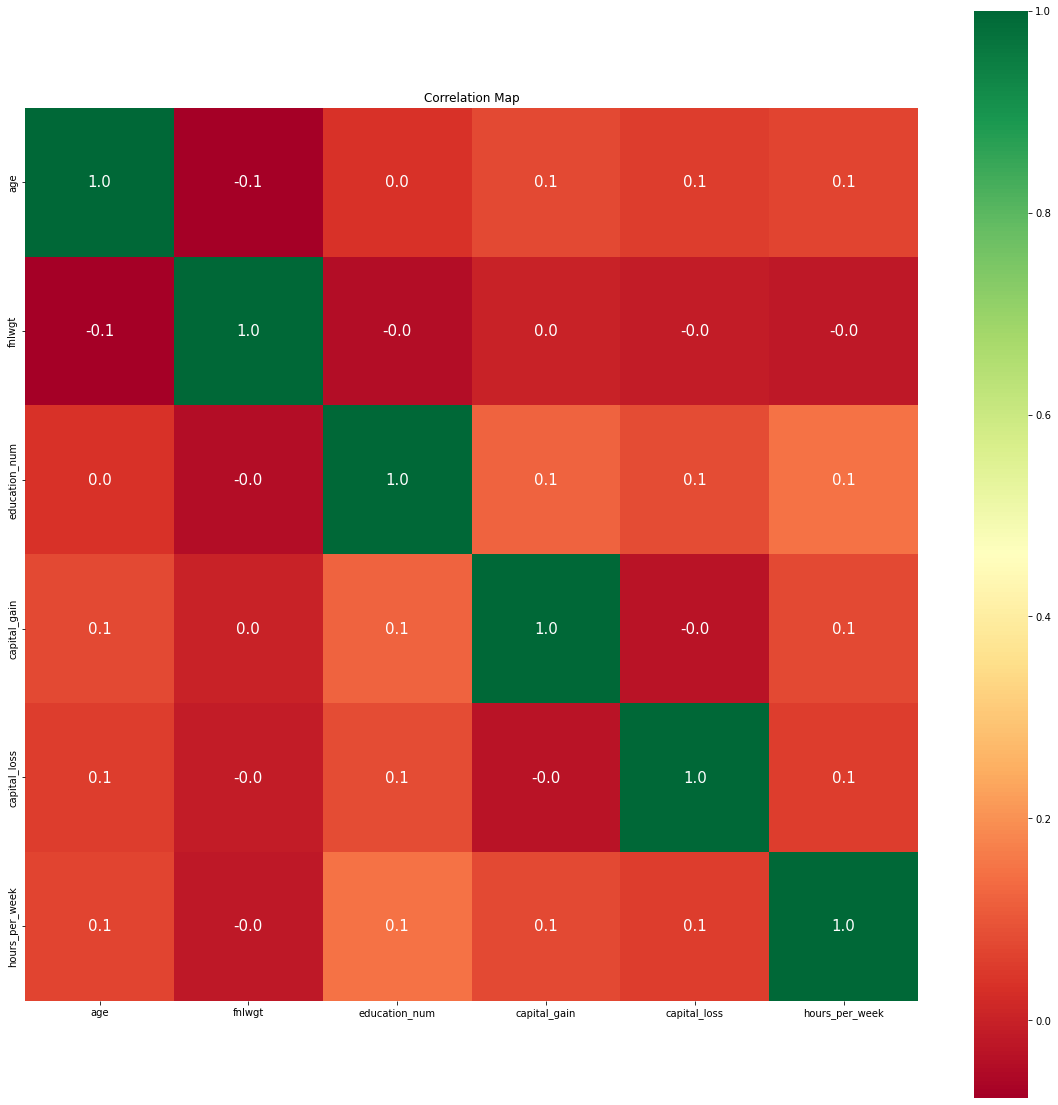

In [57]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True,cmap='RdYlGn', fmt='.1f', annot=True, annot_kws={'size':15})
plt.title('Correlation Map')
plt.show()

In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country',"wage_class"]


    
for column in columns:
    train_set[column] = LabelEncoder().fit_transform(train_set[column])    
    
    
#replace function or mapping function is also used  
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


# After Labeling Train_set

In [59]:
corr=train_set.corr()
corr

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
age,1.000000,0.059423,-0.076646,-0.010508,0.036527,-0.266288,0.012626,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176,0.234037
workclass,0.059423,1.000000,-0.019164,-0.019375,-0.054350,0.042236,0.312511,0.012817,0.018913,0.002306,0.010687,-0.009888,-0.093411,0.001253,-0.055124
fnlwgt,-0.076646,-0.019164,1.000000,-0.028145,-0.043195,0.028153,-0.000521,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.062710,-0.009463
education,-0.010508,-0.019375,-0.028145,1.000000,0.359153,-0.038407,-0.046443,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.075186,0.079317
education_num,0.036527,-0.054350,-0.043195,0.359153,1.000000,-0.069304,0.044096,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.090277,0.335154
marital_status,-0.266288,0.042236,0.028153,-0.038407,-0.069304,1.000000,0.052847,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.020456,-0.199307
occupation,0.012626,0.312511,-0.000521,-0.046443,0.044096,0.052847,1.000000,-0.014625,-0.009966,0.026116,0.012350,0.004540,-0.056995,-0.000479,0.010802
relationship,-0.263698,0.012817,0.008931,-0.010876,-0.094153,0.185451,-0.014625,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010940,-0.250918
race,0.028718,0.018913,-0.021291,0.014131,0.031838,-0.068013,-0.009966,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.111296,0.071846
sex,0.088832,0.002306,0.026858,-0.027356,0.012280,-0.129314,0.026116,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.003013,0.215980


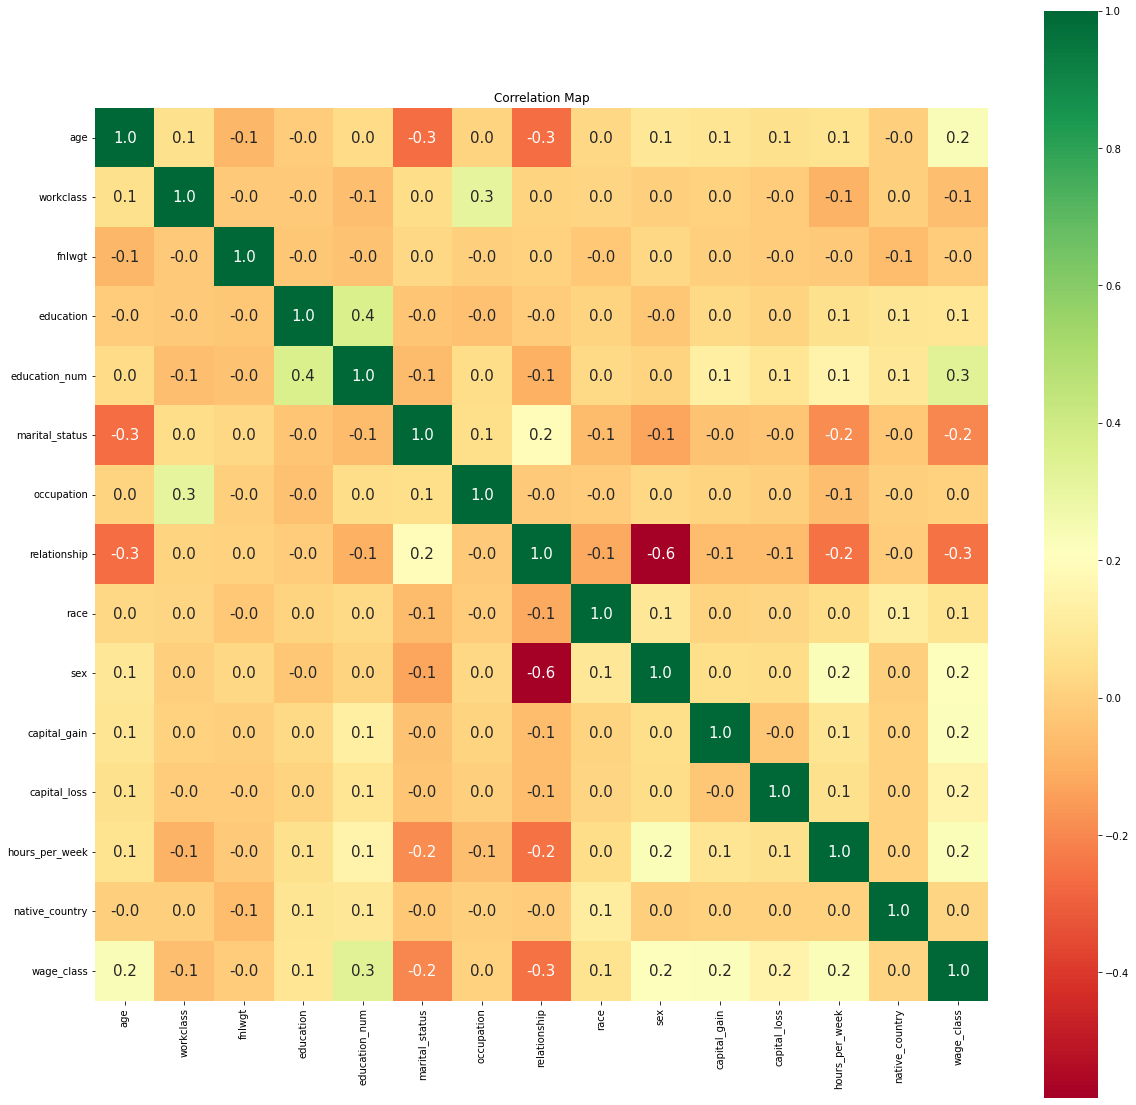

In [60]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True,cmap='RdYlGn', fmt='.1f', annot=True, annot_kws={'size':15})
plt.title('Correlation Map')
plt.show()

##### Now we have to follow the same procedure for the test set in order to assure that both train set and test set come from same distribution

# Test set Preprocessing

In [61]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [62]:
print("======"*15)
print("TEST DATA")
print("Features name in the data set: ","\n",test_set.columns)
print("======"*15)
print('Rows: {} Columns: {}'.format(test_set.shape[0], test_set.shape[1]))
print("======"*15)
print("Shape of the dataset(number of rows and columns):","\n",test_set.shape)
print("======"*15)
print("Information about the dataset: ","\n",test_set.info())

TEST DATA
Features name in the data set:  
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')
Rows: 16281 Columns: 15
Shape of the dataset(number of rows and columns): 
 (16281, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex           

In [63]:
#find out numerical and categorical features for train set

numerical_features=[feature for feature in test_set.columns if test_set[feature].dtype!='O']
categorical_features=[feature for feature in  test_set.columns if  test_set[feature].dtype=='O' and feature!='wage_class']

print('categorical features: ''\n',categorical_features)
print('\n')
print('numerical features: ''\n',numerical_features)

categorical features: 
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


numerical features: 
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [64]:
#Check for missing values
for feature in train_set.columns:
    print(feature,':', test_set[feature].isnull().sum())
#print("Number of missing values each columns: ","\n",train_data.isnull().sum())    
print("======"*15)
print("percentage of missing values each columns: ","\n",test_set.isnull().sum()/len(test_set)*100)    

age : 0
workclass : 0
fnlwgt : 0
education : 0
education_num : 0
marital_status : 0
occupation : 0
relationship : 0
race : 0
sex : 0
capital_gain : 0
capital_loss : 0
hours_per_week : 0
native_country : 0
wage_class : 0
percentage of missing values each columns:  
 age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
wage_class        0.0
dtype: float64


In [65]:
# Viewing the data statistics
print("Summary about the dataset:")
test_set.describe()



Summary about the dataset:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [66]:
test_set.describe(include="O")

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,16281,16281,16281,16281,16281,16281,16281,16281,16281
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.
freq,11210,5283,7403,2032,6523,13946,10860,14662,12435


In [67]:
#find out numerical and categorical features for test set

numerical_features_test=[feature for feature in test_set.columns if test_set[feature].dtype!='O']
categorical_features_test=[feature for feature in  test_set.columns if  test_set[feature].dtype=='O' and feature!='wage_class']

print('categorical features: ''\n',categorical_features_test)
print('\n')
print('numerical features: ''\n',numerical_features_test)

categorical features: 
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


numerical features: 
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


Unique data:  [' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

Numberof unique data:  9 

What are values of unique data: 
  Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)
 Private             68.85 %
 Self-emp-not-inc     8.11 %
 Local-gov            6.41 %
 ?                    5.91 %
 State-gov             4.2 %
 Self-emp-inc         3.56 %
 Federal-gov           2.9 %
 Without-pay          0.04 %
 Never-worked         0.02 %
Name: workclass, dtype: object


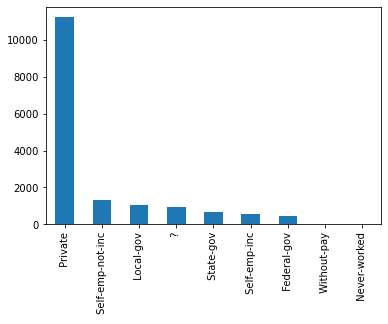

In [68]:
cat_Column(test_set["workclass"])

Unique data:  [' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

Numberof unique data:  9 

What are values of unique data: 
  Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)
 Private             68.85 %
 Self-emp-not-inc     8.11 %
 Local-gov            6.41 %
 ?                    5.91 %
 State-gov             4.2 %
 Self-emp-inc         3.56 %
 Federal-gov           2.9 %
 Without-pay          0.04 %
 Never-worked         0.02 %
Name: workclass, dtype: object


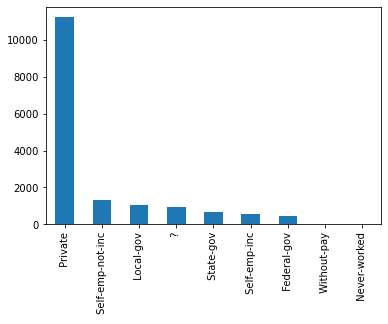

In [69]:
cat_Column(test_set["workclass"])

Unique data:  [' United-States' ' ?' ' Peru' ' Guatemala' ' Mexico'
 ' Dominican-Republic' ' Ireland' ' Germany' ' Philippines' ' Thailand'
 ' Haiti' ' El-Salvador' ' Puerto-Rico' ' Vietnam' ' South' ' Columbia'
 ' Japan' ' India' ' Cambodia' ' Poland' ' Laos' ' England' ' Cuba'
 ' Taiwan' ' Italy' ' Canada' ' Portugal' ' China' ' Nicaragua'
 ' Honduras' ' Iran' ' Scotland' ' Jamaica' ' Ecuador' ' Yugoslavia'
 ' Hungary' ' Hong' ' Greece' ' Trinadad&Tobago'
 ' Outlying-US(Guam-USVI-etc)' ' France'] 

Numberof unique data:  41 

What are values of unique data: 
  United-States                 14662
 Mexico                          308
 ?                               274
 Philippines                      97
 Puerto-Rico                      70
 Germany                          69
 Canada                           61
 India                            51
 El-Salvador                      49
 China                            47
 Cuba                             43
 England                 

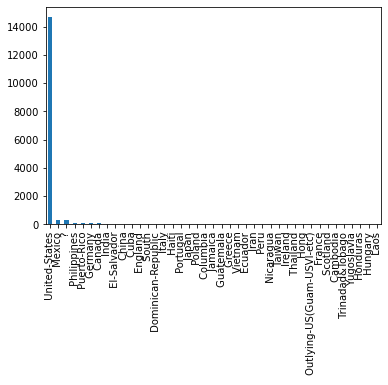

In [70]:
cat_Column(test_set["native_country"])

In [71]:
# changing "?" with unknown

test_set['occupation'] = test_set['occupation'].str.replace('?', 'unknown')
test_set['workclass'] = test_set['workclass'].str.replace('?', 'unknown')
test_set['native_country'] = test_set['native_country'].str.replace('?', 'unknown')

In [72]:
#Find out distinct values for each numerical feature
for feature in numerical_features_test:
    print(feature,':', train_set[feature].nunique())

age : 73
fnlwgt : 21648
education_num : 16
capital_gain : 119
capital_loss : 92
hours_per_week : 94


In [73]:
#Find out distinct values for each numerical feature
for feature in numerical_features_test:
    print(feature,':', test_set[feature].nunique())

age : 73
fnlwgt : 12787
education_num : 16
capital_gain : 113
capital_loss : 82
hours_per_week : 89


In [74]:
#Find out distinct values for each numerical feature
for feature in numerical_features_test:
    print(feature,':', train_set[feature].nunique())

age : 73
fnlwgt : 21648
education_num : 16
capital_gain : 119
capital_loss : 92
hours_per_week : 94


In [75]:
#Find out distinct values for each categorical feature
for feature in categorical_features_test:
    print(feature,':', test_set[feature].nunique())

workclass : 9
education : 16
marital_status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native_country : 41


In [76]:
#Find out distinct values for each categorical feature
for feature in categorical_features_test:
    print(feature,':', train_set[feature].nunique())

workclass : 9
education : 16
marital_status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native_country : 42


In [77]:
#Find out distinct values for each categorical feature
for feature in categorical_features_test:
    print(feature,':', train_set[feature].nunique())

workclass : 9
education : 16
marital_status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native_country : 42


In [78]:
#for each categorical value we calculate relative frequency of unique classes.
for feature in categorical_features_test:
    freq_test=test_set[feature].value_counts('f').rename_axis(feature).reset_index(name='relative frequency')
    print('\n')
    print(freq_test)



           workclass  relative frequency
0            Private            0.688533
1   Self-emp-not-inc            0.081138
2          Local-gov            0.064062
3            unknown            0.059149
4          State-gov            0.041951
5       Self-emp-inc            0.035563
6        Federal-gov            0.028991
7        Without-pay            0.000430
8       Never-worked            0.000184


        education  relative frequency
0         HS-grad            0.324489
1    Some-college            0.220318
2       Bachelors            0.163995
3         Masters            0.057367
4       Assoc-voc            0.041705
5            11th            0.039125
6      Assoc-acdm            0.032799
7            10th            0.028008
8         7th-8th            0.018979
9     Prof-school            0.015847
10            9th            0.014864
11           12th            0.013758
12      Doctorate            0.011117
13        5th-6th            0.010810
14        1st-4t

In [79]:
#Check for imbalanced target (In our case approx 76% are in class <=50K and  approx 24% >50K)
test_set['wage_class'].value_counts('f') 

 <=50K.    0.763774
 >50K.     0.236226
Name: wage_class, dtype: float64

Unique data:  [' <=50K.' ' >50K.'] 

Numberof unique data:  2 

What are values of unique data: 
  <=50K.    12435
 >50K.      3846
Name: wage_class, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)
 <=50K.    76.38 %
 >50K.     23.62 %
Name: wage_class, dtype: object


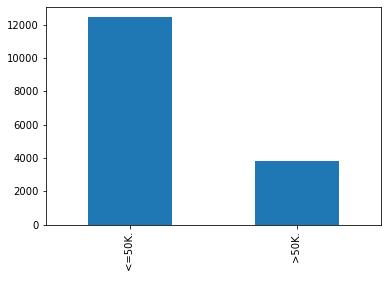

In [80]:
cat_Column(test_set["wage_class"]) # imbalance dataset

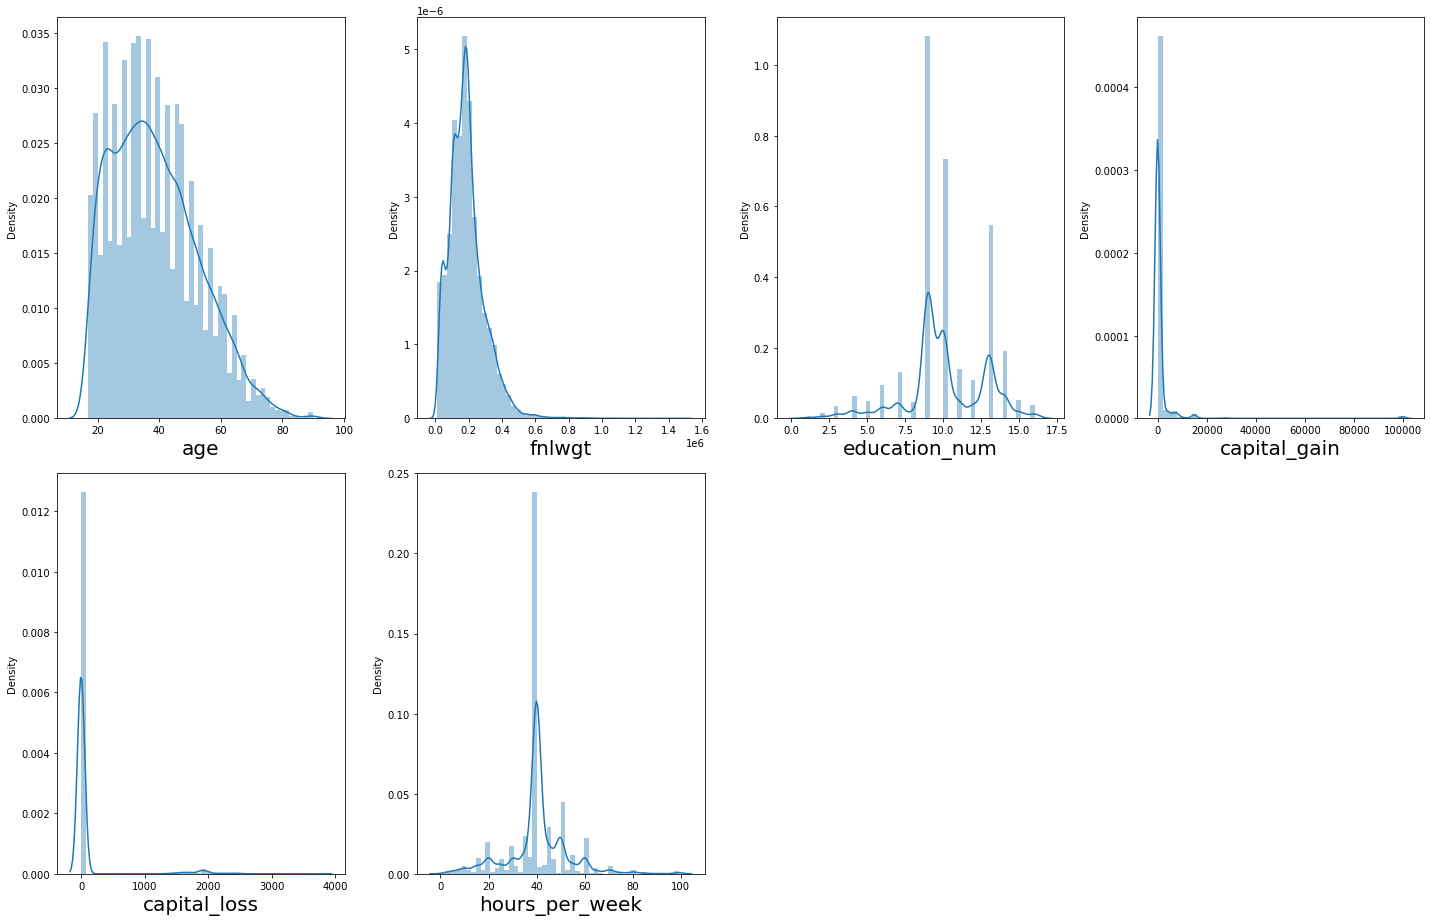

In [81]:
test_numerical_features = test_set.select_dtypes(include='number')

# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in test_numerical_features:
    if plotnumber<=12 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(test_numerical_features[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

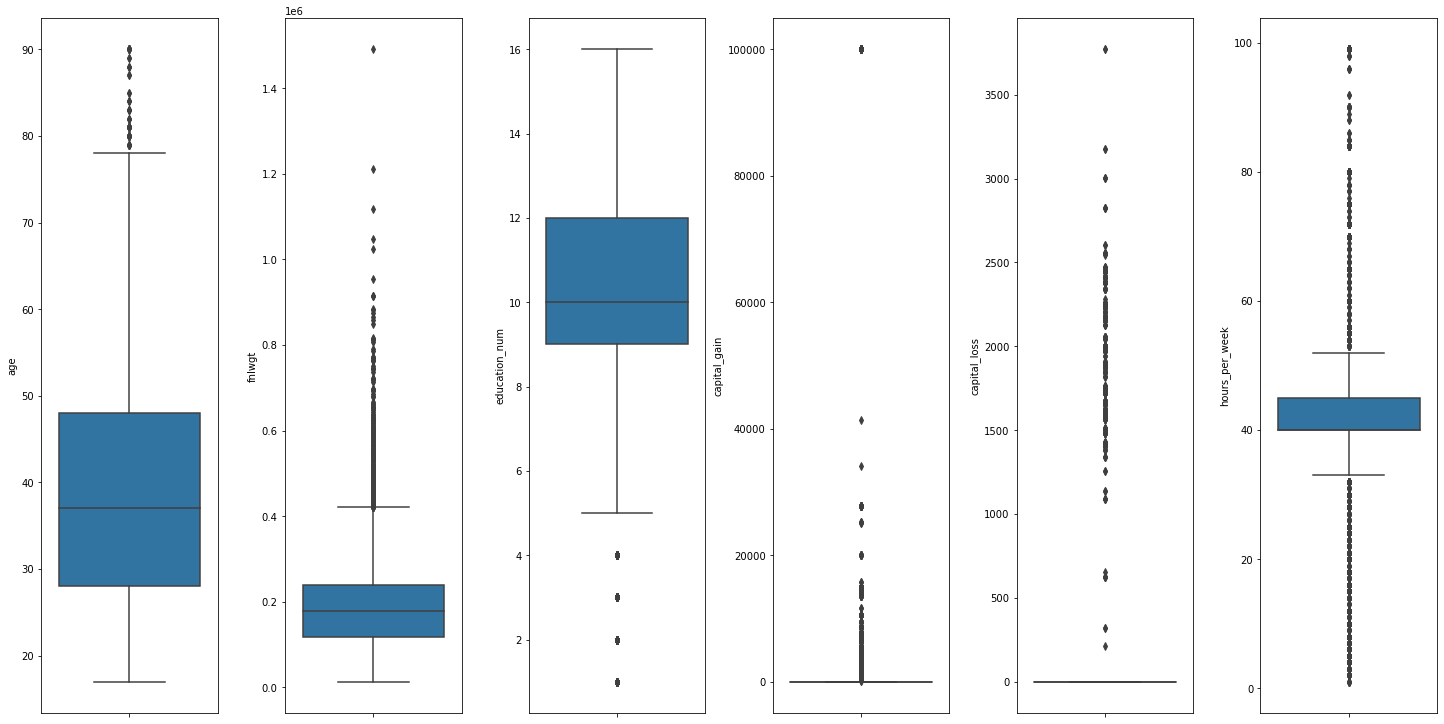

In [82]:
# create a box plot
fig , ax = plt.subplots(ncols=6,nrows=1,figsize=(20,10))
index=0
ax = ax.flatten()

for col, value in test_numerical_features.items():
    sns.boxplot(y=col,data= test_numerical_features, ax = ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0) 

In [83]:
corr=test_set.corr()
corr

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076574,0.019945,0.076377,0.055302,0.077058
fnlwgt,-0.076574,1.000000,-0.029896,-0.011753,0.007386,-0.003155
education_num,0.019945,-0.029896,1.000000,0.130092,0.083077,0.134899
capital_gain,0.076377,-0.011753,0.130092,1.000000,-0.031109,0.089390
capital_loss,0.055302,0.007386,0.083077,-0.031109,1.000000,0.054890
hours_per_week,0.077058,-0.003155,0.134899,0.089390,0.054890,1.000000


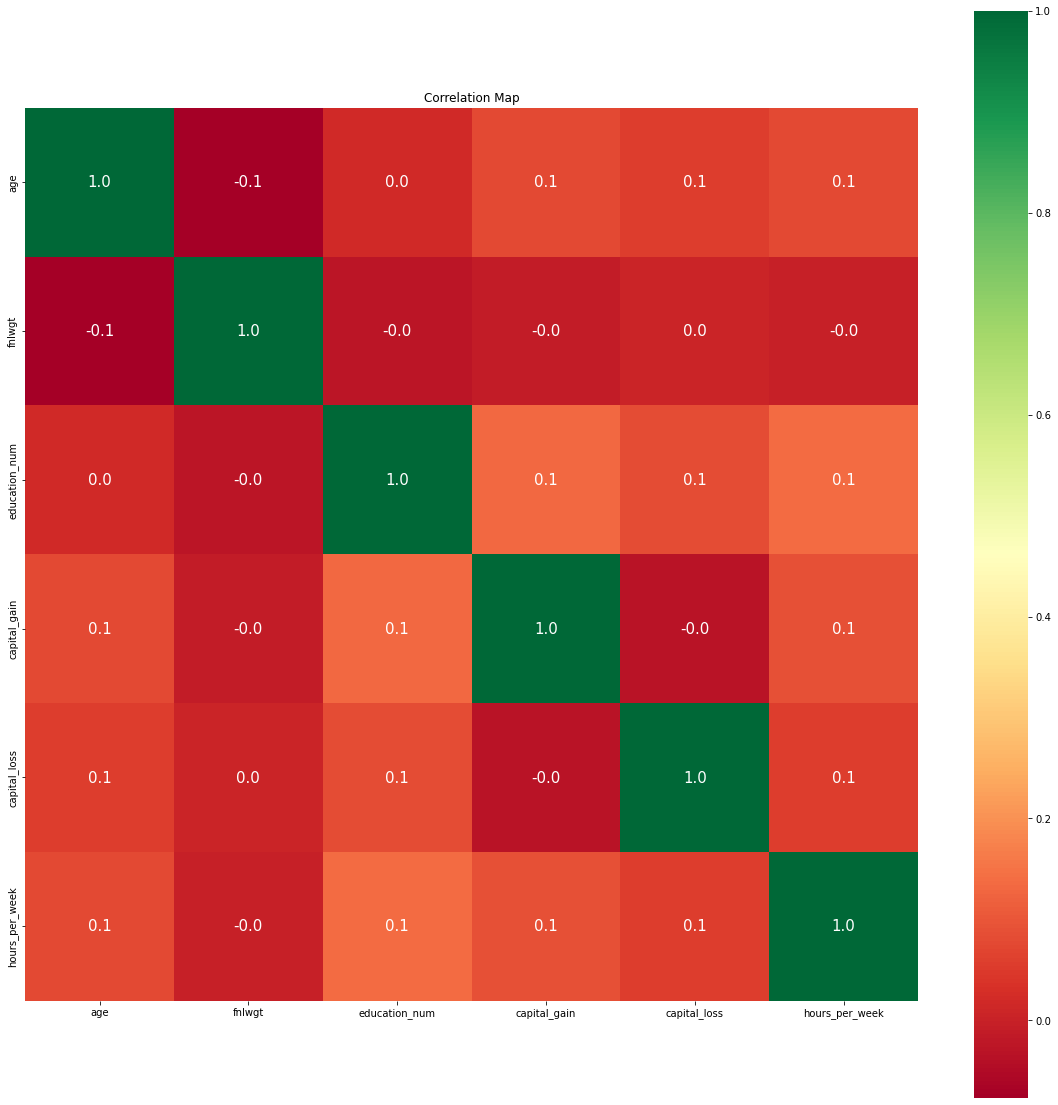

In [84]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True,cmap='RdYlGn', fmt='.1f', annot=True, annot_kws={'size':15})
plt.title('Correlation Map')
plt.show()

# Feature Engineering

In [85]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country',"wage_class"]

for column in columns:
    test_set[column] = LabelEncoder().fit_transform(test_set[column])
    
   
    
    
#replace function or mapping function is also used  
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,37,1
4,18,8,103497,15,10,4,14,3,4,0,0,0,30,37,0


# After Labeling_Test set

In [86]:
corr=test_set.corr()
corr

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
age,1.000000,0.036191,-0.076574,-0.023924,0.019945,-0.259609,-0.004832,-0.262775,0.027767,0.086773,0.076377,0.055302,0.077058,-0.007075,0.223253
workclass,0.036191,1.000000,-0.029450,0.003819,-0.049856,0.053201,0.324887,0.028937,0.033543,-0.005097,0.003174,0.001723,-0.098951,-0.005826,-0.073878
fnlwgt,-0.076574,-0.029450,1.000000,-0.011493,-0.029896,0.033264,-0.009474,0.009404,-0.038689,0.029486,-0.011753,0.007386,-0.003155,-0.048910,-0.000084
education,-0.023924,0.003819,-0.011493,1.000000,0.360692,-0.035383,-0.021277,-0.010550,0.011516,-0.026437,0.026765,0.019424,0.061880,0.074633,0.081596
education_num,0.019945,-0.049856,-0.029896,0.360692,1.000000,-0.071344,0.047217,-0.083233,0.023994,0.003413,0.130092,0.083077,0.134899,0.096167,0.327482
marital_status,-0.259609,0.053201,0.033264,-0.035383,-0.071344,1.000000,0.044981,0.192601,-0.074396,-0.123793,-0.045104,-0.033258,-0.175779,-0.010578,-0.198527
occupation,-0.004832,0.324887,-0.009474,-0.021277,0.047217,0.044981,1.000000,-0.002957,-0.009939,0.013425,-0.000007,0.011439,-0.067292,0.002170,0.000271
relationship,-0.262775,0.028937,0.009404,-0.010550,-0.083233,0.192601,-0.002957,1.000000,-0.119025,-0.574495,-0.053763,-0.049410,-0.253296,0.000781,-0.257930
race,0.027767,0.033543,-0.038689,0.011516,0.023994,-0.074396,-0.009939,-0.119025,1.000000,0.085816,0.012440,0.017973,0.035290,0.115936,0.069142
sex,0.086773,-0.005097,0.029486,-0.026437,0.003413,-0.123793,0.013425,-0.574495,0.085816,1.000000,0.044412,0.045312,0.227077,-0.011391,0.211892


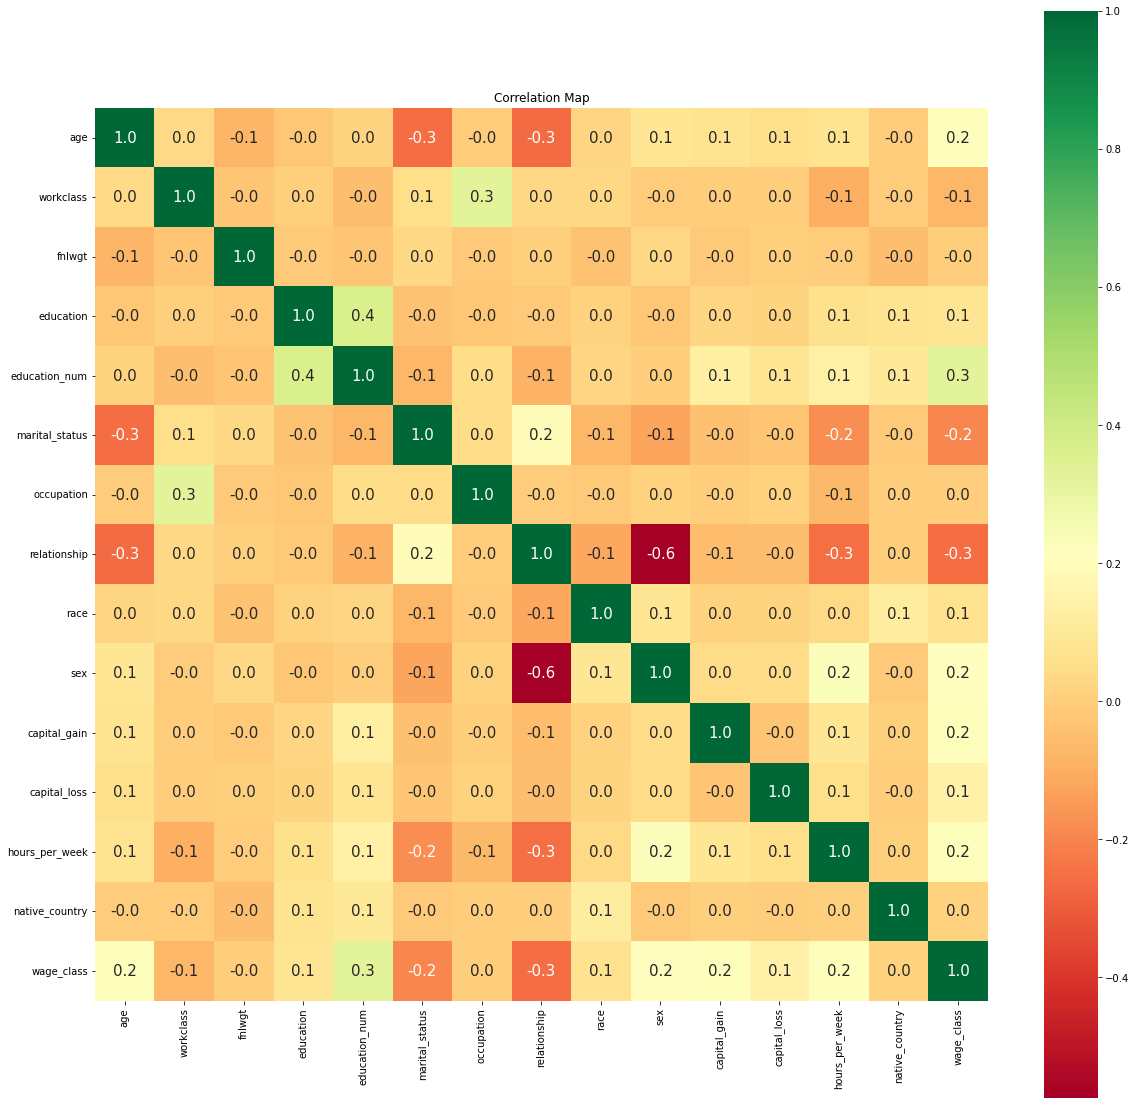

In [87]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True,cmap='RdYlGn', fmt='.1f', annot=True, annot_kws={'size':15})
plt.title('Correlation Map')
plt.show()

In [88]:
train_set.drop('fnlwgt',axis=1,inplace=True)
test_set.drop('fnlwgt',axis=1,inplace=True)

In [117]:
train_set.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0


In [118]:
test_set.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,3,1,7,4,6,3,2,1,0,0,40,37,0
1,38,3,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,3,15,10,2,6,0,2,1,7688,0,40,37,1
4,18,8,15,10,4,14,3,4,0,0,0,30,37,0


In [119]:
X=train_set.drop('wage_class',axis=1)
y=train_set['wage_class']

In [120]:
X.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,6,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,9,13,2,3,0,4,1,0,0,13,38
2,38,3,11,9,0,5,1,4,1,0,0,40,38
3,53,3,1,7,2,5,0,2,1,0,0,40,38
4,28,3,9,13,2,9,5,2,0,0,0,40,4


In [121]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: wage_class, Length: 32561, dtype: int32

# Imbalanced Data- Over Sampling

In [94]:
#Create independent and Dependent Features
columns = train_set.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["wage_class"]]
# Store the variable we are predicting 
target = "wage_class"
# Define a random state 
state = np.random.RandomState(42)
X = train_set[columns]
Y = train_set[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

## Get the Fraud and the normal dataset 

k_50_l = train_set[train_set['wage_class']==0]

k_50_g = train_set[train_set['wage_class']==1]

(32561, 13)
(32561,)


In [95]:
k_50_l.head() #<=50K

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0


In [96]:
k_50_g.head() #>50K

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
7,52,5,11,9,2,3,0,4,1,0,0,45,38,1
8,31,3,12,14,4,9,1,4,0,14084,0,50,38,1
9,42,3,9,13,2,3,0,4,1,5178,0,40,38,1
10,37,3,15,10,2,3,0,2,1,0,0,80,38,1
11,30,6,9,13,2,9,0,1,1,0,0,40,18,1


In [97]:
print(k_50_l.shape,k_50_g.shape)

(24720, 14) (7841, 14)


In [98]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

In [99]:
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X, Y)
print(X_train_res.shape,y_train_res.shape)
print(X.shape)
print(Y.shape)

(49440, 13) (49440,)
(32561, 13)
(32561,)


In [100]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 24720, 1: 7841})
Resampled dataset shape Counter({0: 24720, 1: 24720})


In [101]:
X_train_res

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,6,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,9,13,2,3,0,4,1,0,0,13,38
2,38,3,11,9,0,5,1,4,1,0,0,40,38
3,53,3,1,7,2,5,0,2,1,0,0,40,38
4,28,3,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,42,1,7,12,2,3,5,4,0,0,0,45,38
49436,37,4,11,9,2,3,0,4,1,0,0,50,38
49437,63,3,12,14,0,3,1,4,0,0,0,40,38
49438,60,3,9,13,2,3,0,4,1,0,0,45,38


# StandardScaler

In [122]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [123]:
X_scaled

array([[ 0.03067056,  1.65841165, -0.33543693, ..., -0.21665953,
        -0.03542945,  0.25137765],
       [ 0.83710898,  1.02630576, -0.33543693, ..., -0.21665953,
        -2.22215312,  0.25137765],
       [-0.04264203, -0.23790601,  0.18133163, ..., -0.21665953,
        -0.03542945,  0.25137765],
       ...,
       [ 1.42360965, -0.23790601,  0.18133163, ..., -0.21665953,
        -0.03542945,  0.25137765],
       [-1.21564337, -0.23790601,  0.18133163, ..., -0.21665953,
        -1.65522476,  0.25137765],
       [ 0.98373415,  0.39419988,  0.18133163, ..., -0.21665953,
        -0.03542945,  0.25137765]])

# train_test_split

In [124]:
from sklearn.model_selection import train_test_split
print("Split the data into training and test set")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=123)

print('-'*30,' Shape of train and test dataset ','-'*30)
print('X train : {}, y train: {}'.format(X_train.shape, y_train.shape))
print('X test : {}, y test: {}'.format(X_test.shape, y_test.shape))
print('-'*100)

Split the data into training and test set
------------------------------  Shape of train and test dataset  ------------------------------
X train : (24420, 13), y train: (24420,)
X test : (8141, 13), y test: (8141,)
----------------------------------------------------------------------------------------------------


In [125]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [126]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [127]:
#from sklearn.cross_validation import cross_val_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [128]:
train = xgb.predict(X_train) # clf=model
test = xgb.predict(X_test)

Train_accuracy = accuracy_score(y_train, train)

Test_accuracy = accuracy_score(y_test, test)

print('The training accuracy is', Train_accuracy)
print('The test accuracy is', Test_accuracy)


#check the accuracy

accuracy_2=metrics.accuracy_score(y_test,test)
recall_2= metrics.recall_score(y_test,test)
Precision_2=metrics.precision_score(y_test,test)
f1_score_2=metrics.f1_score(y_test,test)
print("Confusion_matrix accuracy_2 :",accuracy_2)
print("Confusion_matrix precision_2 :",Precision_2)
print("Confusion_matrix recall_2 :",recall_2)
print("Confusion_matrix f1_score_2 :",f1_score_2)


The training accuracy is 0.9018427518427519
The test accuracy is 0.8727429062768701
Confusion_matrix accuracy_2 : 0.8727429062768701
Confusion_matrix precision_2 : 0.7811004784688995
Confusion_matrix recall_2 : 0.6609311740890689
Confusion_matrix f1_score_2 : 0.7160087719298246


In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6165
           1       0.78      0.66      0.72      1976

    accuracy                           0.87      8141
   macro avg       0.84      0.80      0.82      8141
weighted avg       0.87      0.87      0.87      8141



In [130]:
confusion_matrix(y_test, test)

array([[5799,  366],
       [ 670, 1306]], dtype=int64)

In [131]:
X_train_res.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [132]:
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances=feat_importances.nlargest(X_train_res.shape[1])
ax=sns.barplot(feat_importances.index, feat_importances.values ,edgecolor='k', palette='Set2')
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

#### As we can see, Race, Workclass and Native Country are not important features and we will drop them

In [ ]:
train_set.drop(['native_country','race','workclass'],axis=1,inplace=True)
test_set.drop(['native_country','race','workclass'],axis=1,inplace=True)

# Model Selection

In [ ]:
xgb_classifier=XGBClassifier()
score_xgb=cross_val_score(xgb_classifier, X, y, cv=5, n_jobs=-1)

In [ ]:
score_xgb

# Final Model Evaluation

In [ ]:
#Create independent and Dependent Features
columns = train_set.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["wage_class"]]
# Store the variable we are predicting 
target = "wage_class"
# Define a random state 
state = np.random.RandomState(42)
X = train_set[columns]
Y = train_set[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

## Get the Fraud and the normal dataset 

k_50_l = train_set[train_set['wage_class']==0]

k_50_g = train_set[train_set['wage_class']==1]

In [ ]:
k_50_l.head() #<=50K

In [ ]:
k_50_g.head() #>50K

In [ ]:
print(k_50_l.shape,k_50_g.shape)

In [ ]:
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X, Y)
print(X_train_res.shape,y_train_res.shape)
print(X.shape)
print(Y.shape)

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

In [ ]:
x_train=train_set.drop('wage_class',axis=1)
Y_train=train_set['wage_class']

x_test=test_set.drop('wage_class',axis=1)
Y_test=test_set['wage_class']

In [ ]:
F_model = XGBClassifier()
F_model.fit(x_train, Y_train)

In [ ]:
f_train = F_model.predict(x_train) # clf=model
f_test = F_model.predict(x_test)

f_Train_accuracy = accuracy_score(Y_train, f_train)

f_Test_accuracy = accuracy_score(Y_test, f_test)

print('The training accuracy is', f_Train_accuracy)
print('The test accuracy is', f_Test_accuracy)

In [ ]:
accuracyf=metrics.accuracy_score(Y_test,f_test)
recallf= metrics.recall_score(Y_test,f_test)
Precisionf=metrics.precision_score(Y_test,f_test)
f1_scoref=metrics.f1_score(Y_test,f_test)
print("Confusion_matrix accuracy_2 :",accuracyf)
print("Confusion_matrix precision_2 :",recallf)
print("Confusion_matrix recall_2 :",Precisionf)
print("Confusion_matrix f1_score_2 :",f1_scoref,"\n")
print(classification_report(Y_test, f_test))

In [ ]:
xgboost_auc=roc_auc_score(Y_test,f_test)
r_probs = [0 for _ in range(len(Y_test))]
random_auc = roc_auc_score(Y_test, r_probs)
print(xgboost_auc)

In [ ]:
probs=F_model.predict_proba(x_test)
probs

In [ ]:
probs=probs[:,1] #keep probabilities for one class
probs

In [ ]:
r_fpr, r_tpr, _=roc_curve(Y_test,probs)
x=np.arange(0,1.01,0.01)

In [ ]:
plt.plot(r_fpr, r_tpr, label='XGBoost (AUROC = %0.3f)' % xgboost_auc)
plt.plot(x,x, linestyle='--', label='Random prediction (AUROC = %0.3f)' % random_auc)
plt.legend()
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# SAVE MODEL
import pickle

filename = 'censue price.pickle'
pickle.dump(F_model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
x_train

In [ ]:
max(train_set["age"])

In [ ]:
len(x_train.columns)

In [ ]:
max(train_set["education_num"])

In [ ]:
max(train_set["capital_gain"])

In [ ]:
max(train_set["capital_loss"])

In [ ]:
max(train_set["hours_per_week"])

In [134]:
!pip install sklearn-pandas